2025-06-16 23:41:36 - vnstock.common.data.data_explorer - INFO - Không phải là mã chứng khoán, thông tin công ty và tài chính không khả dụng.


<Figure size 1200x600 with 0 Axes>

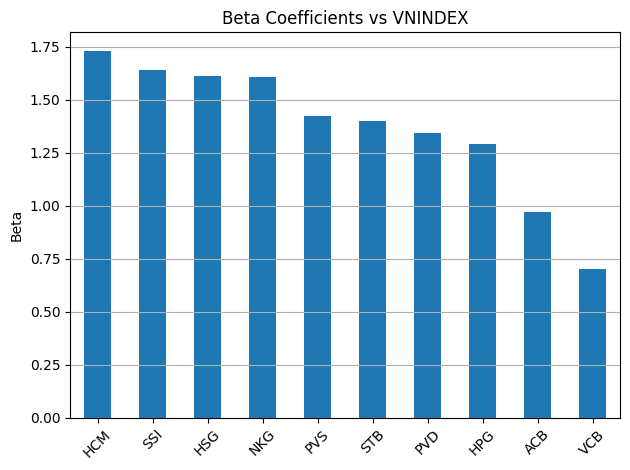

In [ ]:
import pandas as pd
import numpy as np
from vnstock import Vnstock
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define stock list and market index
symbols = ['HPG', 'VCB', 'HSG', 'NKG', 'PVS', 'PVD', 'HCM', 'SSI', 'STB', 'ACB']
market_symbol = 'VNINDEX'

# Function to fetch and format historical data
def get_price(symbol, start, end):
    stock = Vnstock().stock(symbol=symbol, source='VCI')
    df = stock.quote.history(start=start, end=end, interval='1D')
    df.rename(columns={'time': 'Date', 'close': symbol}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df[[symbol]]

# Fetch data for all stocks
start_date = '2022-01-01'
end_date = '2025-06-14'

prices = []
for symbol in symbols:
    prices.append(get_price(symbol, start_date, end_date))

# Combine all into a single DataFrame
price_df = pd.concat(prices, axis=1)

# Fetch market index (VNINDEX)
vnindex_df = get_price('VNINDEX', start_date, end_date)
price_df = price_df.join(vnindex_df)

# Drop rows with missing values
price_df.dropna(inplace=True)

# Calculate daily returns
returns = price_df.pct_change().dropna()

# Calculate beta for each stock
betas = {}
for symbol in symbols:
    X = returns[['VNINDEX']].values
    y = returns[[symbol]].values
    model = LinearRegression().fit(X, y)
    betas[symbol] = model.coef_[0][0]

# Convert to DataFrame
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])

# Plot beta values
plt.figure(figsize=(12, 6))
beta_df.sort_values('Beta', ascending=False).plot(kind='bar', legend=False)
plt.title('Beta Coefficients vs VNINDEX')
plt.ylabel('Beta')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
